# **Description**:

This script was developed to replicate Figure 5 on the manuscript "Relationship Between Environmental Values and the Evaluation of Watershed Conservation Plans that Benefit the Community Versus the Individual." It is designed to be executed in R.

Use R Colab version for replication in a cloud-based environment using the R kernel.

To prepare the final Figure for presentation in the manuscript, the resulting values were formatted in Excel.

## Install libraries

Installing libraries in R-colab may take several minutes

In [1]:
# # install required libraries
install.packages('ca')
install.packages('psych')
install.packages('smacof')
library(ca)
library(psych)
library(smacof)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ucminf’, ‘numDeriv’, ‘ordinal’, ‘rbibutils’, ‘shape’, ‘pan’, ‘jomo’, ‘Rdpack’, ‘checkmate’, ‘glmnet’, ‘mitml’, ‘gtools’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘mice’, ‘gdata’, ‘lme4’, ‘iterators’, ‘plotrix’, ‘colorspace’, ‘e1071’, ‘polynom’, ‘Hmisc’, ‘nnls’, ‘weights’, ‘ellipse’, ‘wordcloud’, ‘foreach’, ‘doParallel’


Loading required package: plotrix


Attaching package: ‘plotrix’


The following object is masked from ‘package:psych’:

    rescale


Loading required package: colorspace

Loading required package: e1071


Attaching package: ‘smacof’


The following object is masked from 

In [ ]:
# Set working directory
#setwd("D:/research/thesis_papers/Paper_02_DM_Human_values/analysis/003_obj3b_Multid_Analysis")
#setwd("E:/OSU_PC_D_drive/research/thesis_papers/Paper_02_DM_Human_values/analysis/003_obj3b_Multid_Analysis")
setwd("D:/work/research_o/paper_02/replica")

## **Part 1. MDS Test-Users**


Configurations:
             D1      D2
e.pvq1  -0.2579 -0.2311
e.pvq2  -0.4154 -0.3320
e.pvq3   0.0833 -0.3632
e.pvq4  -0.0996 -0.5616
e.pvq5  -0.5454 -0.0601
e.pvq6  -0.2321 -0.0793
e.pvq7  -0.6141  0.0694
e.pvq8  -0.5335 -0.2134
e.pvq9  -0.4235  0.1870
e.pvq10 -0.1925  0.0714
e.pvq11 -0.1170  0.2030
e.pvq12 -0.3827  0.3463
e.pvq13  1.4251 -0.3788
e.pvq14  1.3968  0.0121
e.pvq15  0.2541  0.4917
e.pvq16  0.7192  0.3703
e.pvq17 -0.0648  0.4683


Stress per point (in %):
 e.pvq1  e.pvq2  e.pvq3  e.pvq4  e.pvq5  e.pvq6  e.pvq7  e.pvq8  e.pvq9 e.pvq10 
   4.40    4.62   10.08    7.16    4.21    3.04    4.93    5.68    6.38    4.84 
e.pvq11 e.pvq12 e.pvq13 e.pvq14 e.pvq15 e.pvq16 e.pvq17 
   8.48    5.70    5.01    4.33    7.41    7.42    6.29 



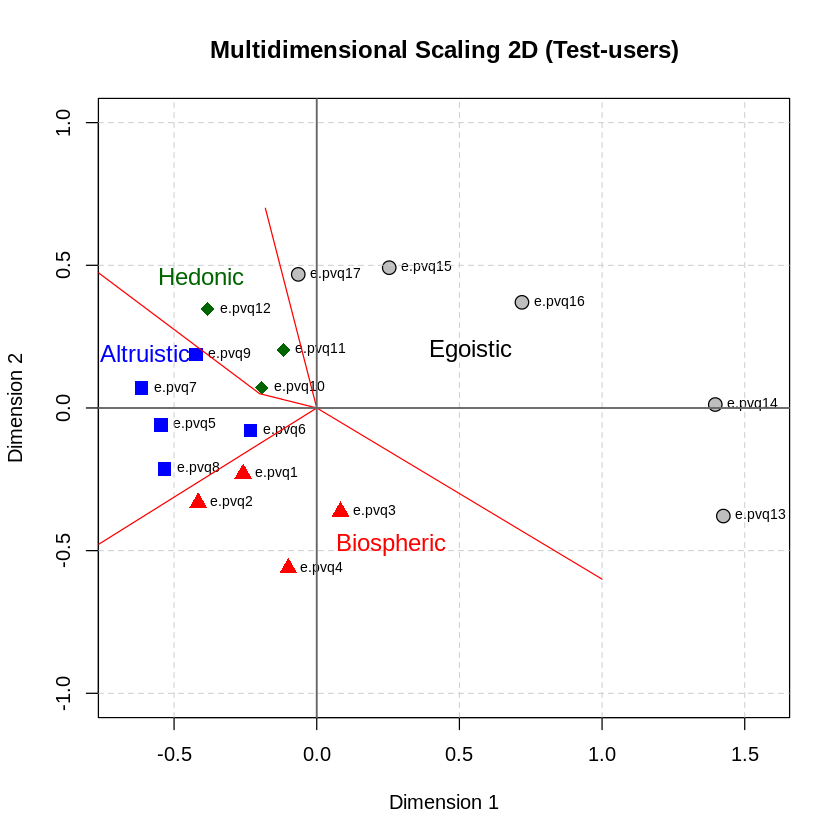

In [2]:
# ======================= MDS Test-Users ======================= #
# Read data & setting up
df_all_users <- read.csv('EPVQ_score_data.csv')
df_test_user <- df_all_users %>%
  filter(Particip == 'Test-user') %>%
  select(-Particip, -pid)

# Get matrix of distances & Compute MDS
dis_test_user <- dist (t(df_test_user))
res2d_test_user <- smacofSym(dis_test_user)
summary(res2d_test_user)

# ------------ MDS Plot (Test-Users) --------------
# Create base plot
plot(res2d_test_user, main = "Multidimensional Scaling 2D (Test-users)",
     type = "n",  # Do not plot anything yet
     pch = 21, bg = "lightblue", col = "darkblue", cex = 1.5,
     ylim = c(-0.0004, 0.00025), label.conf = list(label = FALSE)
     )
# Customizing the MDS points
x_coords <- res2d_test_user$conf[,1]
y_coords <- res2d_test_user$conf[,2]
points(x_coords[1:4], y_coords[1:4], pch = 17, col = "red", bg = "red", cex = 1.5)             # Biospheric
points(x_coords[5:9], y_coords[5:9], pch = 15, col = "blue", bg = "gray", cex = 1.5)           # Altruistic
points(x_coords[10:12], y_coords[10:12], pch = 18, col = "darkgreen", bg = "green", cex = 1.5) # Hedonic
points(x_coords[13:17], y_coords[13:17], pch = 21, col = "black", bg = "gray", cex = 1.5)      # Egoistic

# Add labels to all points
text(x_coords, y_coords, labels = rownames(res2d_test_user$conf), cex = 0.7, pos = 4, col = "black")

# Add customized grid
grid(col = "gray80", lty = 2, lwd = 0.8)

# Add custom rays
segments(0, 0, -0.18, 0.7, col = "red", lwd = 1)                # Line 1
segments(0, 0, 1, -0.6, col = "red", lwd = 1)                   # Line 2
segments(0, 0, -0.8, -0.5, col = "red", lwd = 1.0)             # Line 3
lines(c(0, -0.2, -0.8), c(0, 0.05, 0.5), col = "red", lwd = 1)  # Line 4

# Add lines at x=0 and y=0
abline(h = 0, col = "gray40", lwd = 1.5)  # Horizontal line (y = 0)
abline(v = 0, col = "gray40", lwd = 1.5)  # Vertical line (x = 0)

# Add custom text labels
text(x = c(0.025, -0.80, -0.6, 0.35), y = c(-0.48,  0.18, 0.45, 0.20),
     labels = c("Biospheric", "Altruistic", "Hedonic", "Egoistic"),
     col = c("red", "blue", "darkgreen", "black"),
     cex = 1.2, pos = 4
     )
# ==============================================================================

## **Part 1. MDS End-Users**


Configurations:
             D1      D2
e.pvq1  -0.2532 -0.1835
e.pvq2  -0.3112 -0.4199
e.pvq3   0.0329 -0.5887
e.pvq4   0.1501 -0.2260
e.pvq5  -0.4728 -0.2226
e.pvq6  -0.5627 -0.0762
e.pvq7  -0.5971  0.1300
e.pvq8  -0.6240 -0.0803
e.pvq9  -0.5309  0.1698
e.pvq10 -0.1852  0.2203
e.pvq11 -0.2949  0.5931
e.pvq12 -0.3108  0.2566
e.pvq13  1.3314 -0.0512
e.pvq14  1.2854  0.3104
e.pvq15  0.4507  0.0650
e.pvq16  0.7216 -0.3952
e.pvq17  0.1708  0.4984


Stress per point (in %):
 e.pvq1  e.pvq2  e.pvq3  e.pvq4  e.pvq5  e.pvq6  e.pvq7  e.pvq8  e.pvq9 e.pvq10 
   4.15    9.96    8.64    6.80    7.68    3.06    4.88    3.75    3.30    5.34 
e.pvq11 e.pvq12 e.pvq13 e.pvq14 e.pvq15 e.pvq16 e.pvq17 
  10.36    3.65    3.86    3.25    9.13    5.64    6.55 



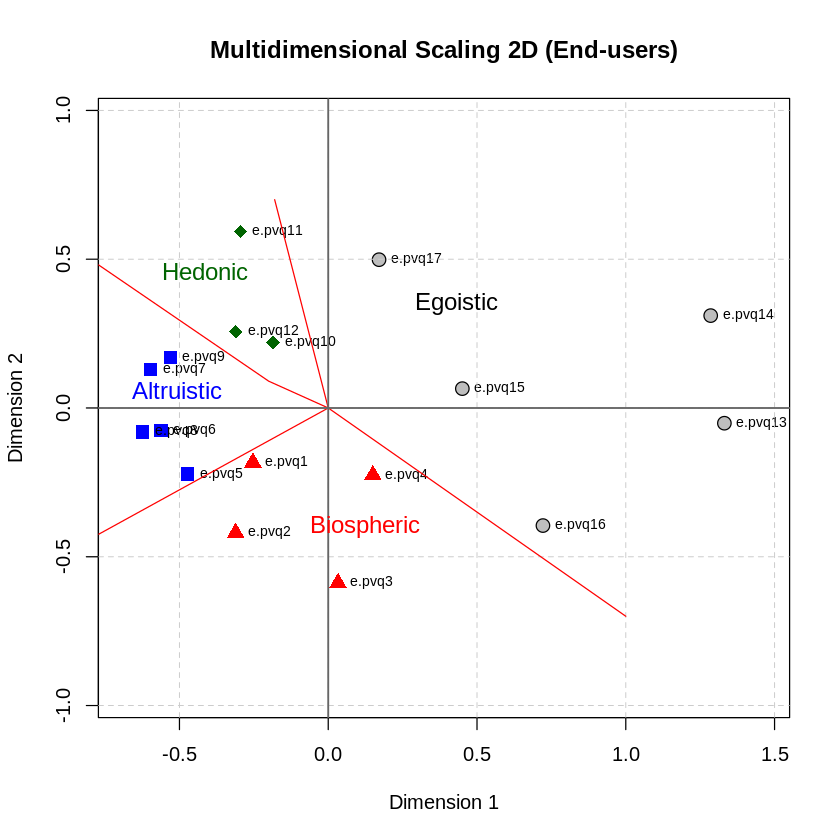

In [3]:
# ======================= MDS End-Users ======================= #
# Read data & setting up
df_all_users <- read.csv('EPVQ_score_data.csv')

df_end_user <- df_all_users %>%
  filter(Particip == 'End-user') %>%
  select(-Particip, -pid)

# Get matrix of distances & Compute MDS
dis_end_user <- dist (t(df_end_user))
res2d_end_user <- smacofSym(dis_end_user)
summary(res2d_end_user)


# ------------ MDS Plot --------------
# Create base plot
plot(res2d_end_user, main = "Multidimensional Scaling 2D (End-users)",
     type = "n",  # Do not plot anything yet
     pch = 21, bg = "lightblue", col = "darkblue", cex = 1.5,
     ylim = c(-0.0004, 0.00025), label.conf = list(label = FALSE)
)
# Customizing the MDS points
x_coords <- res2d_end_user$conf[,1]
y_coords <- res2d_end_user$conf[,2]
points(x_coords[1:4], y_coords[1:4], pch = 17, col = "red", bg = "red", cex = 1.5)             # Biospheric
points(x_coords[5:9], y_coords[5:9], pch = 15, col = "blue", bg = "gray", cex = 1.5)           # Altruistic
points(x_coords[10:12], y_coords[10:12], pch = 18, col = "darkgreen", bg = "green", cex = 1.5) # Hedonic
points(x_coords[13:17], y_coords[13:17], pch = 21, col = "black", bg = "gray", cex = 1.5)      # Egoistic

# Add labels to all points
text(x_coords, y_coords, labels = rownames(res2d_end_user$conf), cex = 0.7, pos = 4, col = "black")

# Add customized grid
grid(col = "gray80", lty = 2, lwd = 0.8)

# Add custom rays
segments(0, 0, -0.18, 0.7, col = "red", lwd = 1)                # Line 1
segments(0, 0, 1, -0.7, col = "red", lwd = 1)                   # Line 2
segments(0, 0, -0.8, -0.44, col = "red", lwd = 1.0)             # Line 3
lines(c(0, -0.2, -0.8), c(0, 0.09, 0.5), col = "red", lwd = 1)  # Line 4

# Add lines at x=0 and y=0
abline(h = 0, col = "gray40", lwd = 1.5)  # Horizontal line (y = 0)
abline(v = 0, col = "gray40", lwd = 1.5)  # Vertical line (x = 0)

# Add custom text labels
text(x = c(-0.10, -0.70, -0.6, 0.25), y = c(-0.40,  0.05, 0.45, 0.35),
     labels = c("Biospheric", "Altruistic", "Hedonic", "Egoistic"),
     col = c("red", "blue", "darkgreen", "black"),
     cex = 1.2, pos = 4
)
# ==============================================================================